In [10]:
# Load data ke dalam data frame 
import pandas as pd

# spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('dataset-150 - buat yang manual.csv', encoding='latin-1') 

df.head()

,No,Data Ulasan,Sentimen
0,1,it beautiful package bintang buat safety nya,Positif
1,2,tipe kulitku kering,Netral
2,3,pengiriman agak lama karena beda provinsi tapi...,Negatif
3,4,top,Positif
4,5,tipe kulitku berminyak tipe kulitku kering tip...,Positif


In [11]:
# Drop kolom pertama dengan fungsi iloc
df = df.drop(df.columns[0], axis=1)

# Cek data teratas
df.head()

,Data Ulasan,Sentimen
0,it beautiful package bintang buat safety nya,Positif
1,tipe kulitku kering,Netral
2,pengiriman agak lama karena beda provinsi tapi...,Negatif
3,top,Positif
4,tipe kulitku berminyak tipe kulitku kering tip...,Positif


In [12]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'Data Ulasan' : 'Review'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# Cek data teratas
df.head()

,Review,Sentimen
0,it beautiful package bintang buat safety nya,Positif
1,tipe kulitku kering,Netral
2,pengiriman agak lama karena beda provinsi tapi...,Negatif
3,top,Positif
4,tipe kulitku berminyak tipe kulitku kering tip...,Positif


In [13]:
# Cek jumlah data per kelas
print(df['Sentimen'].value_counts())
print('\n')

# Cek kelengkapan data
print(df.info())
print('\n')

# Cek statistik deskriptif
print(df.describe())

Netral     72
Positif    55
Negatif    23
Name: Sentimen, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    150 non-null    object
 1   Sentimen  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


                                                   Review Sentimen
count                                                 150      150
unique                                                135        3
top     dari dulu selalu jadi langganan untuk solusi k...   Netral
freq                                                    2       72


In [14]:
# Data untuk label
new_labels = {
    'Negatif' : 0,
    'Netral' : 1,
    'Positif' : 2
}

# Encode label (mengubah label dari spam dan ham menjadi 1 dan 0)
df['Sentimen'] = df['Sentimen'].map(new_labels)

# Cek data teratas
df.head()

,Review,Sentimen
0,it beautiful package bintang buat safety nya,2
1,tipe kulitku kering,1
2,pengiriman agak lama karena beda provinsi tapi...,0
3,top,2
4,tipe kulitku berminyak tipe kulitku kering tip...,2


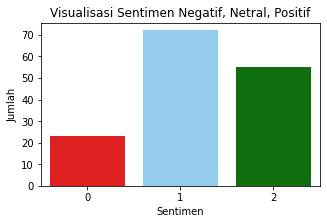

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualisasi sentimen positif, netral, dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sentimen', palette={0: 'red', 1: 'lightskyblue', 2: 'green'})
plt.title('Visualisasi Sentimen Negatif, Netral, Positif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [16]:
# Memisahkan fitur dengan label
X = df['Review'].values
y = df['Sentimen'].values

In [17]:
# Ekstraksi fitur
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Inisialisasi model
mnb = MultinomialNB()

# Membuat objek StratifiedKFold untuk 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi TfidfVectorizer
bow = TfidfVectorizer(max_features=510)


# List untuk menyimpan prediksi dan label sebenarnya dari setiap lipatan
all_predictions = []
all_true_labels = []

# Loop melalui setiap lipatan (fold) dalam cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]  # Data latih dan uji
    y_train, y_test = y[train_index], y[test_index]  # Label data latih dan uji

    # Transformasi seluruh data menggunakan TfidfVectorizer
    X_train_transform = bow.fit_transform(X_train)
    X_test_transform = bow.transform(X_test)

    # Melatih model klasifikasi pada data latih
    mnb.fit(X_train_transform, y_train)

    # Membuat prediksi pada data uji
    predictions = mnb.predict(X_test_transform)

    # Menambahkan prediksi dan label sebenarnya ke dalam list
    all_predictions.extend(predictions)
    all_true_labels.extend(y_test)

In [18]:
# Hitung metrik evaluasi
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

# Print hasil
print("Overall accuracy:", accuracy)
print("Overall precision:", precision)
print("Overall recall:", recall)
print("Overall F1-score:", f1)

print(f'Confusion Matrix : \n {confusion_matrix(all_true_labels, all_predictions)}')
print('-----------------------------------------------------\n')
print(classification_report(all_true_labels, all_predictions, zero_division=0))

Overall accuracy: 0.4533333333333333
Overall precision: 0.37565749235474005
Overall recall: 0.4533333333333333
Overall F1-score: 0.3993098769022003
Confusion Matrix : 
 [[ 0 18  5]
 [ 1 52 19]
 [ 0 39 16]]
-----------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.48      0.72      0.57        72
           2       0.40      0.29      0.34        55

    accuracy                           0.45       150
   macro avg       0.29      0.34      0.30       150
weighted avg       0.38      0.45      0.40       150



In [11]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = bow.transform([new_text])
predicted_sentimen = mnb.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentiment_label = "negatif"
elif predicted_sentimen[0] == 1:
    sentiment_label = "netral"
elif predicted_sentimen[0] == 2:
    sentiment_label = "positif"

print("Hasil Analisis Sentimen untuk Teks Baru : ", sentiment_label)

Hasil Analisis Sentimen untuk Teks Baru :  netral
